---   

# 프로젝트 명 : 유기질 비료 연구와 제약 실험 사례를 통한 통계적 개념 이해
## 프로젝트 목표
    - 머신러닝에 이용되는 통계적 개념을 문제 상황에 적용해봅니다.
    - 2가지 사례를 통해 강의에서 배운 확률 및 통계 개념을 이해하고 의미를 해석해봅니다.

## 프로젝트 구성
    - STEP 1 : 범주형자료를 통해 공분산과 피어슨 상관계수를 확인하고, 두 변수의 상관계수를 알아봅니다.
    - STEP 2 : 통계 가설을 세우고 정규분포의 유의수준을 확인해봅니다.

- 작성자: 이정훈 감수자

---

# STEP1. 범주형자료, 공분산, 상관계수

 
 유기질 비료 연구단체는 해마다 비료 투입량 당 생산량을 조사하고 있다. 지난 10년간 조사한 10아르(약 300평)당 유기질비료 투입량(Input)과 벼 생산량(Output) 데이터는 아래와 같다.

In [1]:
import pandas as pd

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]  # 1~10년

Input = [681, 685, 647, 722, 742, 671, 689, 657, 706, 722] # 10년간 유기질 비료 투입량
Output = [193, 184, 168, 245, 250, 182, 201, 178, 213, 234] # 10년간 벼 생산

ind = ['Input', 'Output'] # 인덱스 명
data = [Input, Output] # 데이터
pd.DataFrame(data, columns=years, index=ind)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Input,681,685,647,722,742,671,689,657,706,722
Output,193,184,168,245,250,182,201,178,213,234


확인한 데이터를 산점도로 시각화해볼 수 있다.

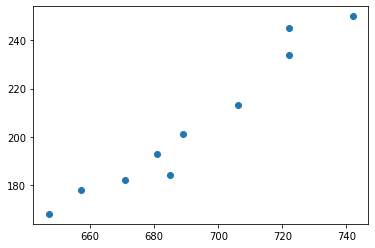

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Input, Output)
plt.show()

### STEP1 - Q1. 모집단에서의 공분산의 정의와 표본에서의 공분산의 정의를 서술하시오.

#### Answer) 모집단에서의 공분산의 정의는?
$Cos(X, Y) = E[(X - mu(X))(Y - mu(Y))]$
$          = E[XY] - E[X]E[Y]$
- 공분산은 X의 편차와 Y의 편차를 공한것의 평균이다. 하나의 값이 증가할 때 다른 값도 증가하면 공분산의 값은 양수가 되고 반대의 경우 공분산의 값은 음수가 된다.

#### Answer) 표본에서의 공분산의 정의는?
$Sxy = Σ(Xi - Xbar)(Yi - Ybar)/(n-1)$
- 표본공분산은 위와 같이 정의한다. Xi와 Yi는 각각 i번째의 x자료와 y자료의 값을 가리키고 Xbar와 Ybar는 각각의 표본평균을 말한다. 이는 표본분산과 마찬가지로 자료가 평균값으로부터 얼마나 떨어져 있는지 나타내는 것이다. 


### STEP1 - Q2. 공분산의 의미를 약술하시오.

#### Answer) 공분산의 의미는?
- 공분산은 두개의 확률변수 X, Y가 상호 어떤 관계를 가지며 변화하는가를 나타낸 측도이다. 공분산 식의 구조 상 X가 X의 평균보다 커질때, Y가 Y의 평균보다 커지는 경향성이 생기면 양의 값, Y의 평균보다 작아지는 경향성이 생기면 음의 값을 가지게 된다. 그리고 해당 커지는 정도가 클수록 공분산의 절대값은 커진자. 즉, 두 자료의 평균을 중심으로 서로 같은 방향으로 움직이면 양의 값, 서로 반대방향으로 움직이면 음의 값을 가지며 그 커지는 정도에 따라 크기를 가지는 값이다. 위 문제에서는 비료 투입량과 생산량의 상호관계를 나타내는 측도를 말한다. 

### STEP1 - Q3. 두 변수(Input, Output)에 대한 공분산을 구하고 그것을 통하여 산점도에서 생산량과 비료투입량 관계를 서술하시오.

#### Answer) 두 변수의 공분산은? (단답식x, 서술하시오)
- 위 문제에서 Xbar는 692.2이고 Ybar는 204.8이다. 이를 적용하여 공분산을 구하면 아래와 같이 868.49이다. 

In [3]:
xbar = sum(Input)/len(Input)
ybar = sum(Output)/len(Output) 

m = 0
for i in range(10):
    m += (Input[i] - xbar)*(Output[i] - ybar)

print("xbar = ", xbar)
print("xbar = ", ybar)    
print(m/9)

xbar =  692.2
xbar =  204.8
868.4888888888888


#### Answer) 생산량-비료투입량의 관계
- 공분산이 양수이므로 비료투입량을 늘렸을 때 생산량도 증가하는 것을 알 수 있다. 이는 산점도에서도 쉽게 확인할 수 있다.

### STEP1 - Q4. 두 변수(Input, Output)에 대한 피어슨 상관계수를 구하시오.

#### Answer) 피어슨 상관계수를 구하시오.
- 상관계수는 두 변수간의 관계의 강도를 말한다. 그리고 주로 피어슨 상관계수가 사용된다. 보통 피어슨 상관계수 값이 0에 가까울수록 상관 관계가 없다고 해석되며 -1과 +1에 가까울 수록 강하다고 한다. 피어슨 상관계수는 공분산을 X와 Y의 표준편차의 곱으로 나눈 값이다.

In [5]:
import numpy as np
sx = np.std(Input, ddof=1)
sy = np.std(Output, ddof=1)
cos = 868.49

p = cos/(sx*sy)
print(p)

0.9702755615167566


# STEP2. 가설검정, P-value


## 가설을 세우고 유의수준을 통해서 검정을 해볼수 있다.


### 한 제약회사에서 생산하고 있는 기존의 진통제는 진통 효과가 나타나는 시간이 평균 30분, 표준편차가 5분인 것으로 알려져 있다. 새로운 진통제를 개발한 연구원들은 새로운 진통제의 효과가 더 빨리 나타난다고 주장한다. 회사의 경영진은 이를 확인하기 위하여 50명의 환자를 임의추출하여 새로운 진통제를 복용시킨 후, 진통 효과가 나타나는 시간의 평균 $\overline{X}$를 조사하기로 하였다. 

### STEP2 - Q1. 위 조사를 위하여 귀무가설과 대립가설을 세우시오.


#### Answer) 귀무가설
- 새로 개발된 진통제는 진통효과가 나타나는 시간이 평균 30분 이상일 것이다. 
$M >= 30$ 

#### Answer) 대립가설
- 새로 개발된 진통제는 진통효과가 나타나는 시간이 평균 30분 미만일 것이다.
$M < 30$

### STEP2 - Q2. 유의수준에 대하여 간단히 약술하시오.


#### Answer) 유의수준이란?
- 유의수준은 가설검정에서 사용되는 기준값이다. 일반적으로 유의수준은 α로 표시한다. 예를 들어 95%의 신뢰도를 기준으로 한다면 (1 - 0.95)인 0.05가 유의수준이 된다.

### STEP2 - Q3. 새로운 진통제의 효과가 나타나는 시간은 표준편차가 5분인 정규분포를 따른다고 할 때, 기각역이 $X \leq 28.5 $ 인 검정법이 유의수준 5%인 검정임을 확인하여라.

#### Answer) 단답x, 서술하시오.
- 아래와 같이 28.5에 해당하는 값은 표준화 후 Z 분포에서 -2.12 값에 해당하고, 1.645보다 절대값이 크므로 귀무가설을 기각합니다.

In [6]:
import math

z_value = (28.5 - 30)/(5/math.sqrt(50))
print(z_value)

-2.121320343559643


In [8]:
from scipy.stats import norm

norm.cdf(z_value)

0.016947426762344623